# Import libs and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings 

warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Data/Modified/food_price_global_varclean.csv', index_col=0)

In [3]:
df.head(15)

,_id,country,food_type,baseline_local,local_price,variation_local,local_currency,local_range,date
0,1,Isle Of Man,Bread and other bakers wares (1kg),2.80,2.89,3.21,£,1.61-3.99,2020-07-19
1,2,Marshall Islands,"Meat of chickens, fresh or chilled (1kg)",4.45,4.45,0.00,$,4.41-4.5,2020-07-19
2,3,Timor-Leste,Rice (1kg),1.88,1.92,2.13,$,0.75-3,2020-07-19
3,4,Burkina Faso,Potatoes (1kg),682.00,682.00,0.00,CFA,600.01-763.99,2020-07-19
4,5,Angola,"Meat of cattle, fresh or chilled (1kg)",10.84,12.43,14.67,$,9.68-15.61,2020-07-19
5,6,Burkina Faso,Lettuce and chicory (1head),437.00,437.00,0.00,CFA,200.00-674.00,2020-07-19
6,7,Maldives,"Meat of chickens, fresh or chilled (1kg)",63.27,63.76,0.77,Rf,47.99-85.01,2020-07-19
7,8,Lesotho,Hen eggs in shell (12),24.53,27.00,10.07,R,24.00-30.00,2020-07-19
8,9,Senegal,Rice (1kg),452.61,450.01,-0.57,CFA,350.01-500.01,2020-07-19
9,10,Mali,Hen eggs in shell (12),1.52,1.86,22.37,$,1.01-2.04,2020-07-19


# Make a subset that focus on orange price in Italy.

This data frame is about food price in over 180 countries on 2020. In order to study time series data, we picked orange price in Italy as the object. Since Italy is the main area for orange production in Europe, price variation in a year could be significant.

In [4]:
data_sub = df.loc[(df['country'] == 'Italy')&(df['food_type']=='Orange (1kg)')]

In [5]:
data_sub.head()

,_id,country,food_type,baseline_local,local_price,variation_local,local_currency,local_range,date
27229,27230,Italy,Orange (1kg),1.67,1.79,7.36,€,0.99-3,2020-07-19
27241,27242,Italy,Orange (1kg),1.67,1.76,5.39,€,0.99-5.69,2020-04-05
27262,27263,Italy,Orange (1kg),1.67,1.81,8.38,€,0.99-3,2021-04-04
27272,27273,Italy,Orange (1kg),1.67,1.79,7.19,€,0.99-3,2020-07-05
27291,27292,Italy,Orange (1kg),1.67,1.79,7.19,€,0.99-3,2020-08-16


In [6]:
data_sub.shape

(18, 9)

In [7]:
# extract 'date' and 'variation_local' from data_sub to make a new dataframe for analyzing time series.

df_oi = data_sub[['date','variation_local']]

In [8]:
df_oi.head()

,date,variation_local
27229,2020-07-19,7.36
27241,2020-04-05,5.39
27262,2021-04-04,8.38
27272,2020-07-05,7.19
27291,2020-08-16,7.19


In [9]:
df_oi.shape

(18, 2)

# Decompisition

In [10]:
# Set the "Date" column as the index

from datetime import datetime

df_oi['datetime'] = pd.to_datetime(df_oi['date']) # Create a datetime column from 'date'column.
df_oi = df_oi.set_index('datetime') # Set the datetime as the index of the dataframe.
df_oi.drop(['date'], axis=1, inplace=True) # Drop the 'date'column.
df_oi.head()

,variation_local
datetime,
2020-07-19,7.36
2020-04-05,5.39
2021-04-04,8.38
2020-07-05,7.19
2020-08-16,7.19


In [11]:
# sort the index to make a right plot.

df_oi.sort_index(inplace=True)

In [12]:
df_oi.head()

,variation_local
datetime,
2020-04-05,5.39
2020-05-03,5.49
2020-05-17,7.19
2020-06-14,7.19
2020-06-28,7.19


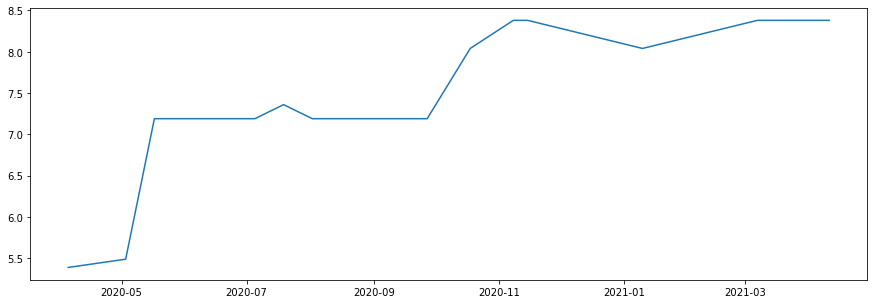

In [13]:
# Plot the new data set

plt.figure(figsize=(15,5))
plt.plot(df_oi)

In [14]:
df_oi.isnull().sum()

variation_local    0
dtype: int64

In [15]:
dup = df_oi.duplicated()
dup.sum()

# These are not duplicated values! They are just same number in different date.

12

In [16]:
decomposition = sm.tsa.seasonal_decompose(df_oi, model='additive', period=1)

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

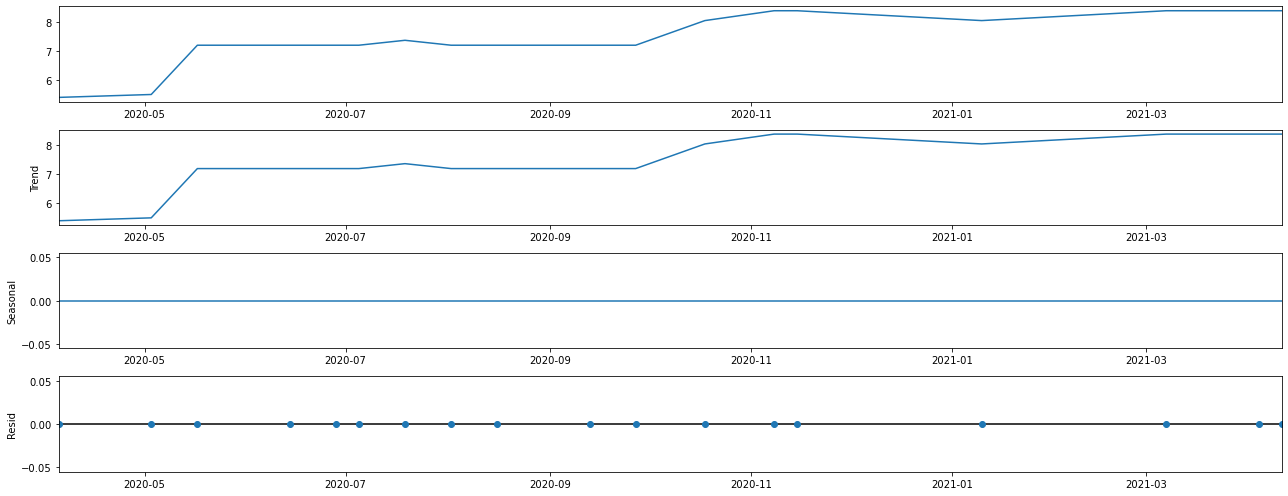

In [18]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity-- Dicky-Fuller test

Null hypothesis: the data is not stationary.
We need to reject the null hypothesis to confirm stationarity, then we can conduct time series analysis.

In [19]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_oi['variation_local'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.366779
p-value                         0.151333
Number of Lags Used             0.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


Test statistic is larger than critical value(5%), which means we cannot reject the null hypothesis in a significance level of 5 percent. p-value is much larger than 0.05, which means the test result is not significant.

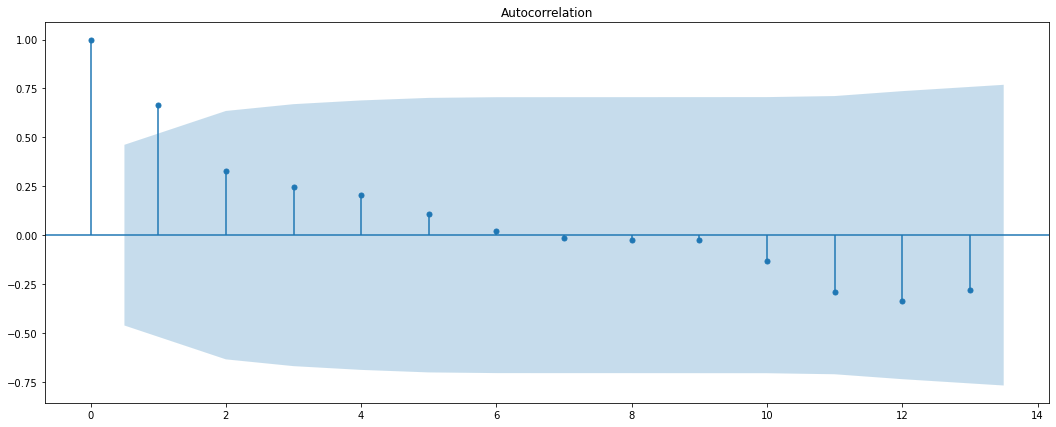

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_oi)
plt.show()

# Stationarizing the orange price data

In [21]:
data_diff = df_oi - df_oi.shift(1)

In [22]:
data_diff.dropna(inplace = True)

In [23]:
data_diff.head()

,variation_local
datetime,
2020-05-03,0.1
2020-05-17,1.7
2020-06-14,0.0
2020-06-28,0.0
2020-07-05,0.0


In [24]:
data_diff.columns

Index(['variation_local'], dtype='object')

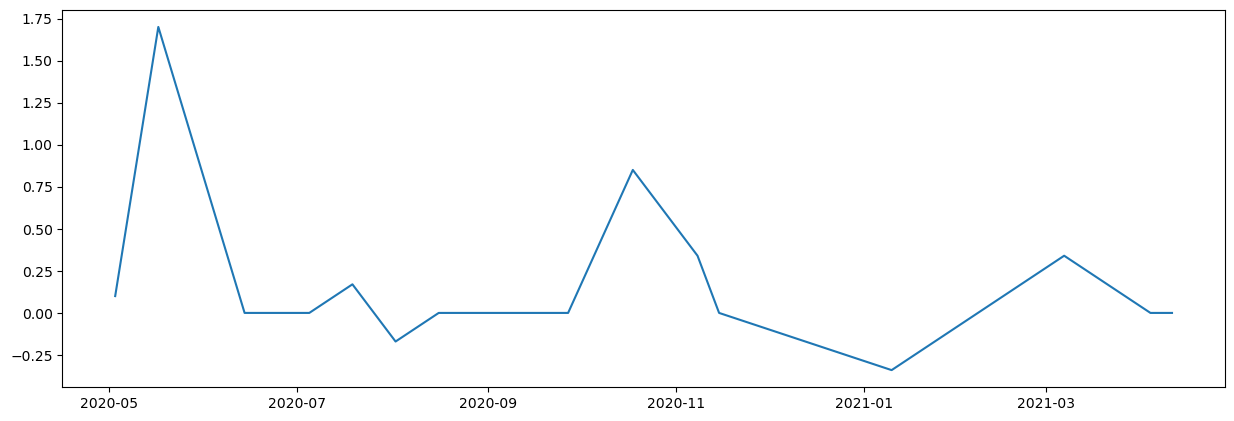

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [26]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.978080
p-value                         0.001530
Number of Lags Used             0.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


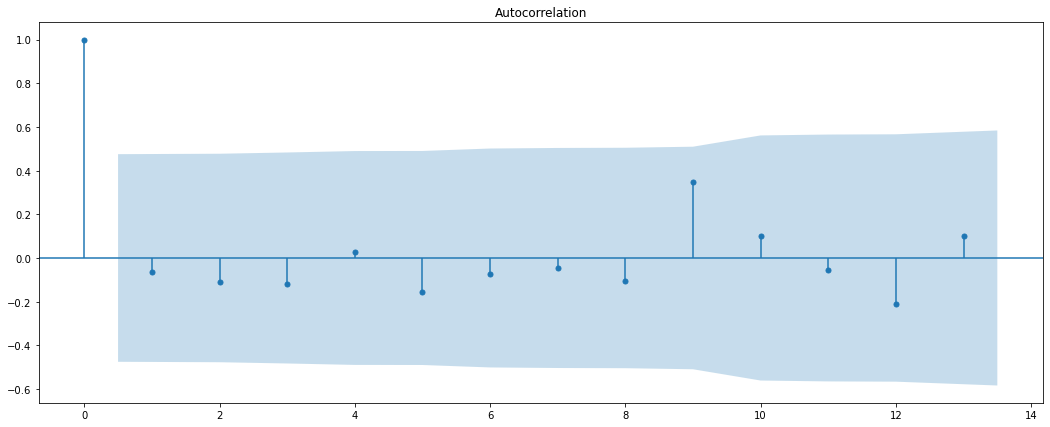

In [27]:
plot_acf(data_diff)
plt.show()

From Dicky-Fuller test, test statistic is smaller than critical value(5%), p-value is smaller than 0.05. That means the new data is stationary.